# Super COVID-19 dataframe

In [1]:
import pandas as pd 
import numpy as np

### Confirmed Cases
Data frame for confirmed COVID-19 cases

In [2]:
cases_df = pd.read_csv('COVID-19_DATA/covid_confirmed_usafacts.csv')
cases_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


### Confirmed Deaths
Data frame for COVID-19 deaths

In [3]:
deaths_df = pd.read_csv('COVID-19_DATA/covid_deaths_usafacts.csv')
deaths_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


### Population for counties

In [4]:
population_df = pd.read_csv('COVID-19_DATA/covid_county_population_usafacts.csv')
population_df.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


### Merge all three variables (cases, deaths, and population)

In [5]:
# Merges cases_df with deaths_df csv
merged_cases_deaths = pd.merge(cases_df, deaths_df, on=['countyFIPS','County Name', 'State'], suffixes=('_cases', '_deaths'))

# Merges merged_cases_deaths with population_df
super_covid_df = pd.merge(merged_cases_deaths, population_df, on=['countyFIPS','State'])

# Drops the duplicate rows
merged_df = super_covid_df.drop_duplicates()

# Gets rid of the rows with 'Statewide Unallocated'
super_covid_csv = merged_df[merged_df["County Name_x"] != "Statewide Unallocated"]

# Resets the indexes
super_covid_csv = super_covid_csv.reset_index(drop=True)

# Save super data to csv file
super_covid_csv.to_csv('super_COVID19_data.csv', index=False)


### Super COVID-19 data

In [6]:
super_covid_csv

,countyFIPS,County Name_x,State,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,County Name_y,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,Autauga County,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,Baldwin County,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,Barbour County,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,Bibb County,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,261,Blount County,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,142,Sweetwater County,42343
3138,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,Teton County,23464
3139,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,Uinta County,20226
3140,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,Washakie County,7805


# Calculate COVID-19 Trends
## State: Hawaii

In [7]:
# Gets only rows with 'HI' - Hawaii State
HI = cases_df[cases_df['State'] == 'HI']

# The last seven days (last week of data)
last_week_cols = HI.iloc[:, -7:]

# Calculates the total sum of cases
daily = last_week_cols.sum()
daily_df = daily.reset_index()
daily_df.columns = ['Date', 'Total Cases']

daily_df

,Date,Total Cases
0,2023-07-17,393081
1,2023-07-18,393081
2,2023-07-19,393081
3,2023-07-20,393081
4,2023-07-21,393757
5,2023-07-22,393757
6,2023-07-23,393757


## Plot
A simple graph to view if cases are increasing, decreasing, or stable

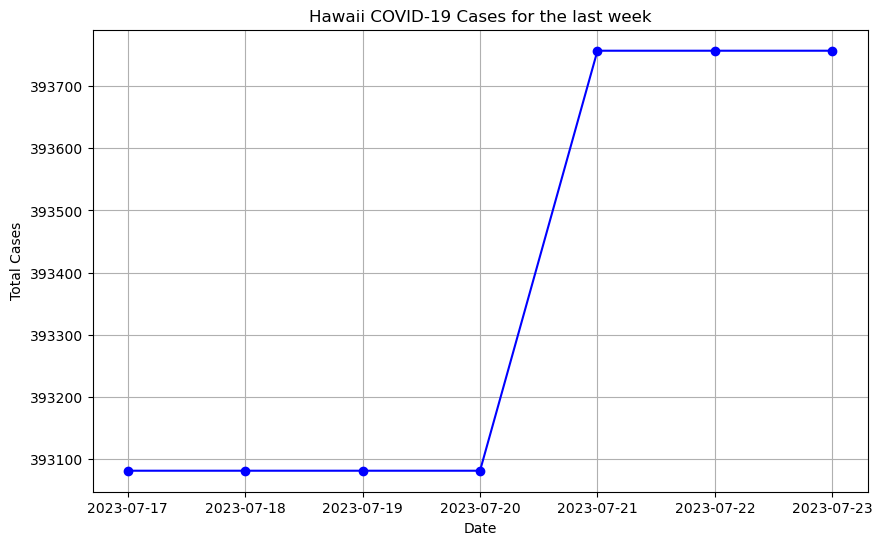

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(daily_df['Date'], daily_df['Total Cases'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Hawaii COVID-19 Cases for the last week')
plt.grid(True)
plt.show()

### We can see that between 07/20 - 07/21 there was an increase of 676 confirmed cases 

# Census Demographic

In [9]:
import pandas as pd
import numpy as np

census = pd.read_csv('census_demographic.csv', low_memory=False)

### Original Data

In [10]:
census

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,0500000US01001,"Autauga County, Alabama",55639,*****,27052,167,28587,167,94.6,1.1,...,0.7,(X),(X),41959,(X),47.6,0.4,52.4,0.4,NaN
2,0500000US01003,"Baldwin County, Alabama",218289,*****,105889,253,112400,253,94.2,0.4,...,0.4,(X),(X),167986,(X),47.8,0.2,52.2,0.2,NaN
3,0500000US01005,"Barbour County, Alabama",25026,*****,13156,86,11870,86,110.8,1.5,...,0.6,(X),(X),19468,(X),53.2,0.2,46.8,0.2,NaN
4,0500000US01007,"Bibb County, Alabama",22374,*****,12022,170,10352,170,116.1,3.6,...,0.3,(X),(X),17583,(X),53.6,0.4,46.4,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",51089,*****,24420,*****,26669,*****,91.6,*****,...,0.1,(X),(X),41192,(X),47.0,0.1,53.0,0.1,NaN
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8508,*****,4356,148,4152,148,104.9,7.3,...,0.6,(X),(X),6869,(X),50.2,0.2,49.8,0.2,NaN
3219,0500000US72149,"Villalba Municipio, Puerto Rico",21899,*****,10589,*****,11310,*****,93.6,*****,...,0.2,(X),(X),17310,(X),47.4,0.1,52.6,0.1,NaN
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",32867,*****,15883,*****,16984,*****,93.5,*****,...,0.1,(X),(X),26747,(X),47.6,0.1,52.4,0.1,NaN


### Modifying data
The original data is all over the place so we need to modify it to be able to merge perfectly.

In [11]:
# Saves the original first two columns
two_columns = census.iloc[:, :2]

# Concatenates the original first two columns along with the entries from row 0 ignoring the first two entries of the row
new_columns = list(two_columns.columns) + list(census.iloc[0,2:])

# Assigns the new column names to the DataFrame
census.columns = new_columns

# Clean the columns to get rid of the '!!' and replace with ' '
census.columns = census.columns.str.replace('!', ' ')

# Drops the first row and resets the indexes
census = census.drop(index=0)
census = census.reset_index(drop=True)

# Drops Puerto Rico counties and resets the indexes
census = census[~census['NAME'].str.contains('Puerto Rico', na=False)]
census = census.reset_index(drop=True)

# Change column 'GEO_ID' to 'countyFIPS' and remove '0500000US' for the entries
census.rename(columns={'GEO_ID': 'countyFIPS'}, inplace=True)
census['countyFIPS'] = census['countyFIPS'].str.replace('0500000US', '', regex=False)

# Change column 'NAME' to 'County Name' and remove everything after the ',' for entries
census.rename(columns={'NAME': 'County Name'}, inplace=True)
census['County Name'] = census['County Name'].str.split(',', n=1).str[0].str.strip()

# Save Edited Demographic CSV
census.to_csv('Modified_Census_Demographic.csv', index=False)

### Modified Census Demographic data

In [12]:
census

,countyFIPS,County Name,Estimate SEX AND AGE Total population,Margin of Error SEX AND AGE Total population,Estimate SEX AND AGE Total population Male,Margin of Error SEX AND AGE Total population Male,Estimate SEX AND AGE Total population Female,Margin of Error SEX AND AGE Total population Female,Estimate SEX AND AGE Total population Sex ratio (males per 100 females),Margin of Error SEX AND AGE Total population Sex ratio (males per 100 females),...,"Percent Margin of Error HISPANIC OR LATINO AND RACE Total population Not Hispanic or Latino Two or more races Two races excluding Some other race, and Three or more races",Percent Total housing units,Percent Margin of Error Total housing units,"Percent CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population","Percent Margin of Error CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population","Percent CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Male","Percent Margin of Error CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Male","Percent CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Female","Percent Margin of Error CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Female",NaN
0,01001,Autauga County,55639,*****,27052,167,28587,167,94.6,1.1,...,0.7,(X),(X),41959,(X),47.6,0.4,52.4,0.4,NaN
1,01003,Baldwin County,218289,*****,105889,253,112400,253,94.2,0.4,...,0.4,(X),(X),167986,(X),47.8,0.2,52.2,0.2,NaN
2,01005,Barbour County,25026,*****,13156,86,11870,86,110.8,1.5,...,0.6,(X),(X),19468,(X),53.2,0.2,46.8,0.2,NaN
3,01007,Bibb County,22374,*****,12022,170,10352,170,116.1,3.6,...,0.3,(X),(X),17583,(X),53.6,0.4,46.4,0.4,NaN
4,01009,Blount County,57755,*****,28677,153,29078,153,98.6,1.0,...,0.3,(X),(X),42978,(X),48.9,0.3,51.1,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Sweetwater County,43352,*****,22340,151,21012,151,106.3,1.5,...,0.6,(X),(X),30673,(X),51.8,0.6,48.2,0.6,NaN
3139,56039,Teton County,23356,*****,12335,252,11021,252,111.9,4.8,...,0.6,(X),(X),17153,(X),52.1,1.0,47.9,1.0,NaN
3140,56041,Uinta County,20374,*****,10315,112,10059,112,102.5,2.3,...,0.4,(X),(X),14112,(X),50.5,0.6,49.5,0.6,NaN
3141,56043,Washakie County,7933,*****,4036,93,3897,93,103.6,4.9,...,0.4,(X),(X),5974,(X),50.8,0.9,49.2,0.9,NaN


### Merge Super COVID-19 data with Demographic
Both data frames have a shared column 'countyFIPS' and 'County Name' but for simplicity I'll only merge on 'countyFIPS'

In [13]:
# Census['countyFIPS'].dtype = object
# So it doesn't let us merge we need to change it to int64
census['countyFIPS'] = census['countyFIPS'].astype('int64')

# Merging super_covid_csv with census
super_demographic = pd.merge(super_covid_csv, census, on='countyFIPS', how='inner')

# Save merged file
super_demographic.to_csv('uper_Demographic_data.csv', index=False)

### Super COVID-19 and Demographic Merged
The super COVID-19 data and Enrichment data merged. 

In [14]:
super_demographic

,countyFIPS,County Name_x,State,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,"Percent Margin of Error HISPANIC OR LATINO AND RACE Total population Not Hispanic or Latino Two or more races Two races excluding Some other race, and Three or more races",Percent Total housing units,Percent Margin of Error Total housing units,"Percent CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population","Percent Margin of Error CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population","Percent CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Male","Percent Margin of Error CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Male","Percent CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Female","Percent Margin of Error CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population Female",NaN
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0.7,(X),(X),41959,(X),47.6,0.4,52.4,0.4,NaN
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0.4,(X),(X),167986,(X),47.8,0.2,52.2,0.2,NaN
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0.6,(X),(X),19468,(X),53.2,0.2,46.8,0.2,NaN
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0.3,(X),(X),17583,(X),53.6,0.4,46.4,0.4,NaN
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,0.3,(X),(X),42978,(X),48.9,0.3,51.1,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.6,(X),(X),30673,(X),51.8,0.6,48.2,0.6,NaN
3137,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.6,(X),(X),17153,(X),52.1,1.0,47.9,1.0,NaN
3138,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.4,(X),(X),14112,(X),50.5,0.6,49.5,0.6,NaN
3139,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.4,(X),(X),5974,(X),50.8,0.9,49.2,0.9,NaN
